In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from adjustText import adjust_text

In [54]:
df_1 =pd.read_csv('white_wines_clean.csv', sep=';', header=0, encoding_errors='replace', encoding='ansi')
df_2 =pd.read_csv('df_whites_cluster.csv', sep=',', header=0, encoding_errors='replace', encoding='ansi')

In [28]:
df_1.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes
0,Vie di Romans,Dolée,4.2,31,36.00,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Friulano,2008.0,64.4267,26.4338,51.6989,albero da frutta/agrume/legno
1,Serafini & Vidotto,Phigaia El Blanco,3.8,28,15.90,na / na / na,Italia,delle Venezie,Miscela,2018.0,NaN,NaN,NaN,NaN
2,Vie di Romans,Ciampagnis Chardonnay,4.1,38,21.15,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Chardonnay,2020.0,62.6386,25.1236,51.0969,legno/albero da frutta/agrume
3,Fattoria Sardi,Vermentino,3.9,46,12.00,Pasta / Vegetariano / Antipasti e spuntini,Italia,Colline Lucchesi,Vermentino,2019.0,39.3159,24.7480,66.3812,albero da frutta/agrume/Erbaceo
4,Panizzi,Vernaccia di San Gimignano Blanco,3.8,400,9.90,Pasta / Vegetariano / Antipasti e spuntini,Italia,Vernaccia di San Gimignano,Vernaccia di San Gimignano,2018.0,43.9714,18.4180,66.2523,albero da frutta/agrume/Erbaceo


In [55]:
df_2.drop(['R', 'G', 'B'], axis=1, inplace=True)
df_2.head()

,Name,Clusters
0,'Askos' Verdeca 2021'.png,3
1,003 Pecorino 2019'.png,2
2,010 Lugana 2020'.png,6
3,12 e Mezzo Malvasia del Salento 2020'.png,4
4,40 Quarantanni Riserva Bianco 2018'.png,6


In [56]:
def clean_name(x):
    x = x.replace('\'.png', '')
    if x.split()[-1].isdigit():
        x = x.replace(x.split()[-1], '')
    else:
        x = x
    return x.rstrip()

In [57]:
df_2['Name'] = df_2['Name'].apply(clean_name)
df_2.head()

,Name,Clusters
0,'Askos' Verdeca,3
1,003 Pecorino,2
2,010 Lugana,6
3,12 e Mezzo Malvasia del Salento,4
4,40 Quarantanni Riserva Bianco,6


In [47]:
df_1.sort_values('name', inplace=True)
df_1.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes
1373,Li Veli,'Askos' Verdeca,3.9,34,15.40,Frutti di mare / Vegetariano / Antipasti e spu...,Italia,Valle d'Itria,Verdeca,2021.0,64.7363,7.82405,34.4239,albero da frutta/Erbaceo/agrume
65,Castrum Morisci,003 Pecorino,4.0,34,12.40,Pasta / Vegetariano / Antipasti e spuntini,Italia,Falerio,Pecorino,2019.0,45.9176,10.85740,67.6427,agrume/Erbaceo
1920,Bulgarini,010 Lugana,4.2,145,13.97,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Lugana,Verdicchio,2020.0,60.1968,19.78160,49.9027,albero da frutta/Erbaceo/agrume
1411,Varvaglione,12 e Mezzo Malvasia del Salento,3.8,90,7.96,Frutti di mare / Vegetariano / Antipasti e spu...,Italia,Salento,Malvasia,2020.0,59.2072,19.06450,28.3689,albero da frutta/nota tropicale/Erbaceo
1435,Cantina Colomba Bianca,40 Quarantanni Riserva Bianco,4.3,53,19.20,Frutti di mare / Vegetariano / Antipasti e spu...,Italia,Sicilia,Miscela,2018.0,54.5857,34.21570,43.7539,agrume/Erbaceo/nota tropicale


In [58]:
dfinal = df_1.merge(df_2, left_on='name', right_on='Name')
dfinal.head()

,company,name,avg_review,num_review,price,food_advice,country,region,wine_type,year,legg_strutt,secco_dolce,piatto_acid,notes,Name,Clusters
0,Serafini & Vidotto,Phigaia El Blanco,3.8,28,15.90,na / na / na,Italia,delle Venezie,Miscela,2018.0,NaN,NaN,NaN,NaN,Phigaia El Blanco,2
1,Vie di Romans,Ciampagnis Chardonnay,4.1,38,21.15,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Chardonnay,2020.0,62.6386,25.1236,51.0969,legno/albero da frutta/agrume,Ciampagnis Chardonnay,7
2,Vie di Romans,Ciampagnis Chardonnay,4.1,368,25.80,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Chardonnay,2018.0,62.6386,25.1236,51.0969,legno/albero da frutta/agrume,Ciampagnis Chardonnay,7
3,Vie di Romans,Ciampagnis Chardonnay,4.2,141,30.00,Pasta / Frutti di mare / Formaggio a pasta dur...,Italia,Friuli Isonzo,Chardonnay,2019.0,62.6386,25.1236,51.0969,legno/albero da frutta/agrume,Ciampagnis Chardonnay,7
4,Fattoria Sardi,Vermentino,3.9,46,12.00,Pasta / Vegetariano / Antipasti e spuntini,Italia,Colline Lucchesi,Vermentino,2019.0,39.3159,24.7480,66.3812,albero da frutta/agrume/Erbaceo,Vermentino,4


In [21]:
info = dfinal.groupby(['Clusters', 'wine_type'], as_index=False)['price'].sum().sort_values(by='price', ascending=0)
info.set_index('Clusters').head(10)


,wine_type,price
Clusters,,


In [59]:
types_aggr = dfinal.groupby('Clusters').mean()

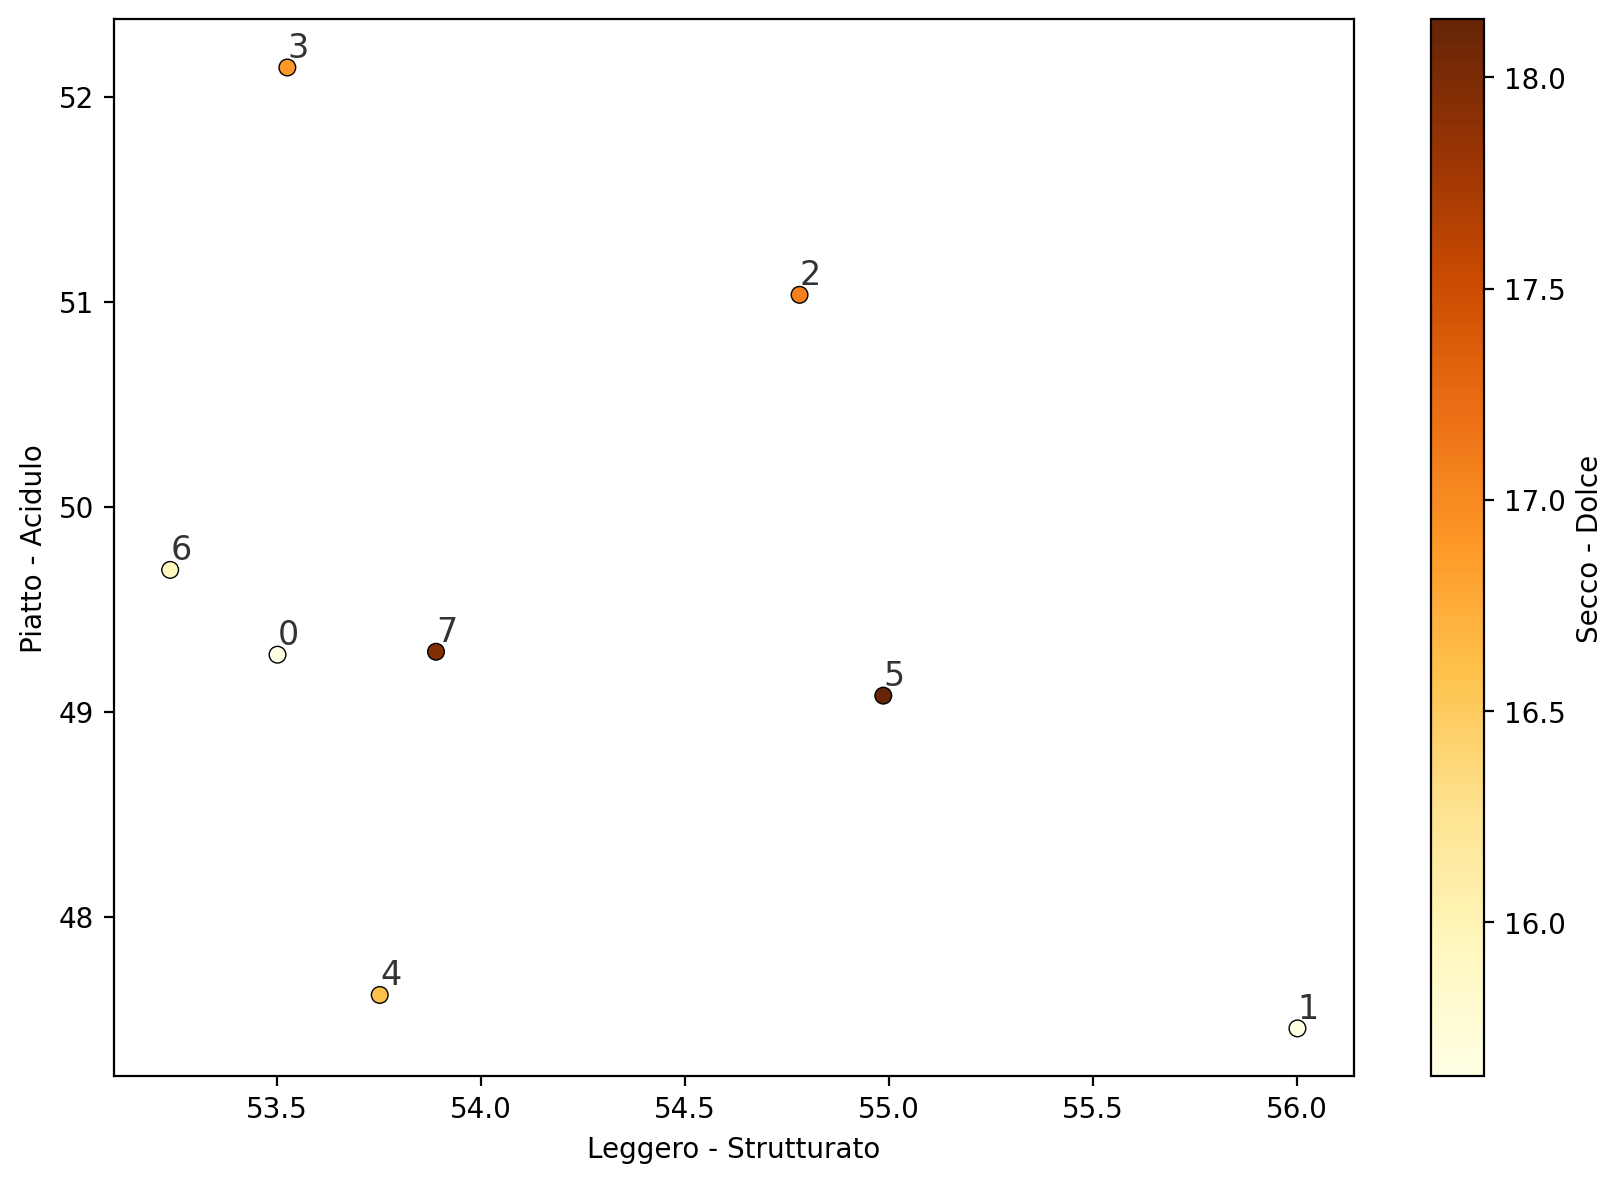

In [60]:
fig = plt.figure(figsize=(10,7), dpi=200)
plt.scatter(types_aggr.legg_strutt, types_aggr.piatto_acid, c=types_aggr.secco_dolce, cmap='YlOrBr', edgecolors='black', linewidths=0.5)
plt.xlabel('Leggero - Strutturato')
plt.ylabel('Piatto - Acidulo')
plt.colorbar(label='Secco - Dolce')

texts = []
for idtx, row in types_aggr.iterrows():
    texts.append(plt.annotate(idtx, (row.legg_strutt, row.piatto_acid), fontsize=12, alpha=0.8))
adjust_text(texts)
plt.show()

fig.savefig("cluster_labels_structure.png")
fig.savefig("cluster_labels_structure.svg" ,format="svg")

<AxesSubplot:xlabel='price', ylabel='Clusters'>

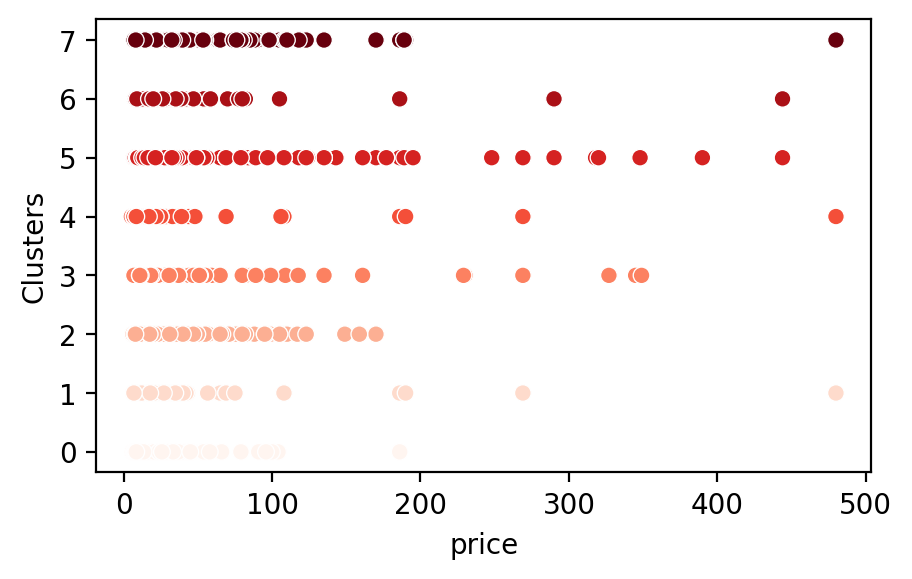

In [65]:
plt.figure(figsize=(5,3), dpi=200)
sns.scatterplot(data=dfinal,x='price', y='Clusters', hue='Clusters', palette='Reds', legend=False)

<AxesSubplot:xlabel='Clusters'>

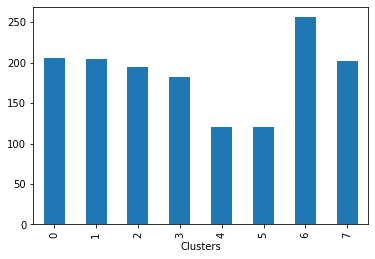

In [105]:
dfinal.groupby("Clusters")['price'].mean().plot(kind='bar')

In [64]:
dfinal.groupby('Clusters')['price'].max()

Clusters
0    186.0
1    480.0
2    170.0
3    349.0
4    480.0
5    444.0
6    444.0
7    480.0
Name: price, dtype: float64

In [108]:
dfinal.groupby('Clusters')['Name'].count()

Clusters
0    597 
1    836 
2    761 
3    1122
4    113 
5    655 
6    423 
7    674 
Name: Name, dtype: int64

In [61]:
hist, bins = np.histogram(dfinal['Clusters'], bins=range(0, len(set(dfinal['Clusters'])) + 1))
sizes = dict(zip(bins, hist))

for id_cluster, size in sizes.items():
    print('Cluster %d: %d (%.2f%%)' % (id_cluster, size, (size/len(dfinal))*100))

Cluster 0: 418 (14.04%)
Cluster 1: 374 (12.56%)
Cluster 2: 311 (10.45%)
Cluster 3: 293 (9.84%)
Cluster 4: 249 (8.36%)
Cluster 5: 510 (17.13%)
Cluster 6: 319 (10.72%)
Cluster 7: 503 (16.90%)


In [109]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

dfinal['price'].value_counts()

C:\Users\rikk-\AppData\Local\Temp\ipykernel_6884\1632251687.py:3: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


85.00      88
49.00      73
170.00     67
336.00     59
66.00      56
69.00      55
95.00      54
135.00     54
79.00      52
49.90      48
50.00      43
59.90      42
55.00      40
39.90      40
53.98      36
59.00      36
76.00      35
45.00      34
427.00     34
47.00      33
99.00      33
199.00     32
54.00      32
51.00      31
161.00     30
376.00     30
143.00     29
393.00     29
64.00      29
45.90      28
152.00     28
179.00     28
180.00     28
108.00     28
119.00     27
74.00      27
44.00      26
318.00     26
230.00     26
129.90     25
40.50      25
41.50      25
169.00     25
41.80      25
70.00      24
598.00     24
110.00     23
255.00     23
48.00      23
283.00     23
42.00      23
1110.00    22
189.00     22
27.90      21
105.00     21
89.00      21
195.00     21
31.00      20
90.00      20
109.00     20
212.00     20
36.00      20
340.00     19
115.00     19
269.00     19
155.00     19
69.90      19
769.00     18
92.00      18
98.00      17
53.50      17
45.50 

In [110]:
dfinal.groupby('Clusters')['wine_type'].value_counts()

Clusters  wine_type                  
0         Nebbiolo                       241
          Miscela                        129
          Sangiovese                     83 
          Corvina                        35 
          Merlot                         33 
          Cabernet Sauvignon             20 
          Barbera                        10 
          Primitivo                      7  
          Cabernet Franc                 6  
          Sagrantino                     5  
          Montepulciano                  4  
          Negroamaro                     4  
          Aglianico                      2  
          Grenache                       2  
          Nero d'Avola                   2  
          Pinot Nero                     2  
          Shiraz/Syrah                   2  
          Corvina Veronese               1  
          Gaglioppo                      1  
          Lagrein                        1  
          Marzemino                      1  
          Nero di

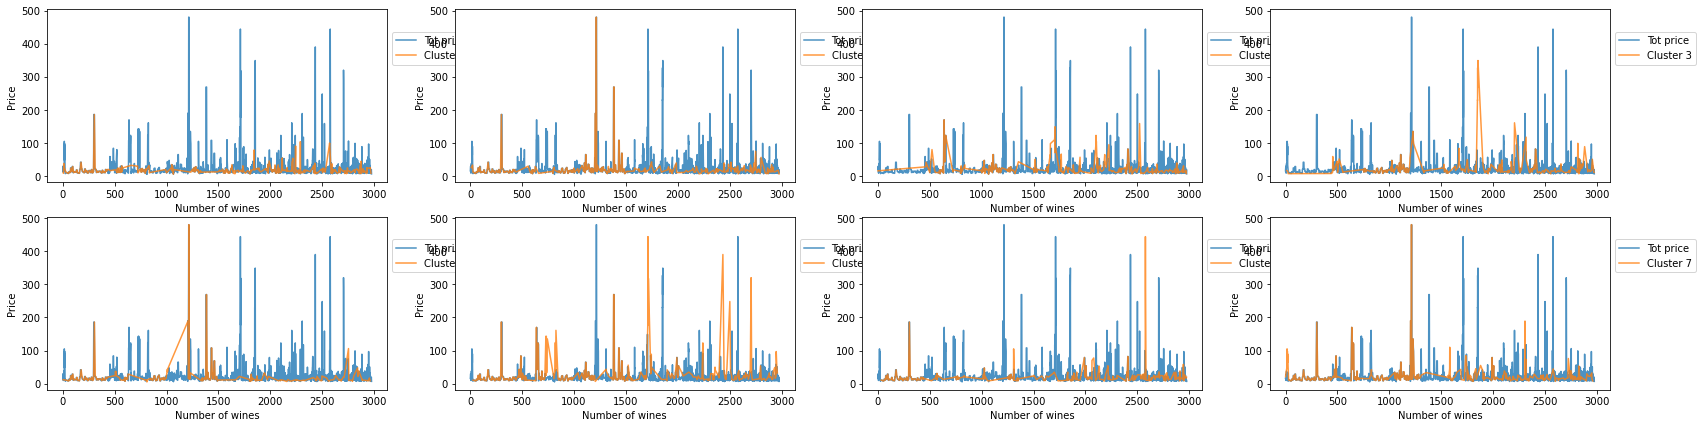

In [62]:
fig = plt.figure(figsize=(28, 7))

rows = 2
columns = 4

fig.add_subplot(rows, columns, 1)

dfinal.groupby(dfinal.Clusters == 0)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 0']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 2)

dfinal.groupby(dfinal.Clusters == 1)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 1']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 3)

dfinal.groupby(dfinal.Clusters == 2)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 2']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 4)

dfinal.groupby(dfinal.Clusters == 3)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 3']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 5)

dfinal.groupby(dfinal.Clusters == 4)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 4']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 6)

dfinal.groupby(dfinal.Clusters == 5)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 5']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 7)

dfinal.groupby(dfinal.Clusters == 6)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 6']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.add_subplot(rows, columns, 8)

dfinal.groupby(dfinal.Clusters == 7)['price'].plot(legend=True, alpha=0.8)
my_labels = ['Tot price', 'Cluster 7']
plt.legend(bbox_to_anchor =(1, 0.9), labels=my_labels)
plt.xlabel('Number of wines')
plt.ylabel('Price')

fig.savefig("cluster_labels_price.png")
fig.savefig("cluster_labels_price.svg" ,format="svg")



In [112]:
dfinal.groupby('Clusters')['price'].mean()

Clusters
0    205.730586
1    204.531926
2    194.182089
3    182.570045
4    120.153009
5    120.340504
6    255.985012
7    202.346217
Name: price, dtype: float64

In [113]:
dfinal.groupby('Clusters')['price'].max()

Clusters
0    2900.0
1    2900.0
2    2818.0
3    2900.0
4    658.0 
5    1110.0
6    2900.0
7    2900.0
Name: price, dtype: float64

In [114]:
dfinal.groupby('Clusters')['price'].min()

Clusters
0    10.25
1    7.50 
2    10.50
3    10.40
4    8.20 
5    14.89
6    10.40
7    9.50 
Name: price, dtype: float64

In [115]:
dfinal.groupby('Clusters')['avg_review'].mean()

Clusters
0    4.422781
1    4.411483
2    4.394087
3    4.402050
4    4.410619
5    4.375420
6    4.399291
7    4.400593
Name: avg_review, dtype: float64

In [116]:
dfinal.groupby('Clusters')['avg_review'].max()

Clusters
0    4.8
1    4.9
2    4.8
3    4.8
4    4.8
5    4.8
6    4.8
7    4.9
Name: avg_review, dtype: float64

In [117]:
dfinal.groupby('Clusters')['avg_review'].min()

Clusters
0    4.2
1    4.2
2    4.2
3    4.2
4    4.2
5    4.2
6    4.2
7    4.2
Name: avg_review, dtype: float64

In [63]:
dfinal.groupby('Clusters')['legg_strutt', 'piatto_acid', 'secco_dolce'].mean()

C:\Users\rikk-\AppData\Local\Temp\ipykernel_17564\3906083359.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  dfinal.groupby('Clusters')['legg_strutt', 'piatto_acid', 'secco_dolce'].mean()


,legg_strutt,piatto_acid,secco_dolce
Clusters,,,
0,53.501103,49.277794,15.635659
1,56.002256,47.455136,15.650097
2,54.781270,51.033083,17.067776
3,53.525179,52.141871,16.894292
4,53.751778,47.618277,16.601604
5,54.986669,49.078093,18.137042
6,53.237859,49.691519,15.927834
7,53.889757,49.292291,17.947236


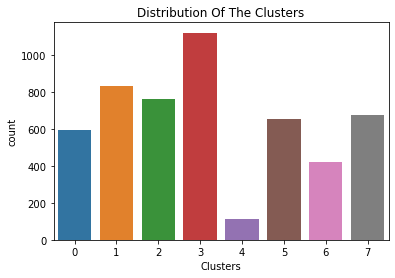

In [119]:
pl = sns.countplot(x=dfinal["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()